In [6]:
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import utils # written by author
from glob import glob
from datetime import datetime
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
##################################################
# Load transaction 
##################################################

transactions = utils.read_multiple_csv('../input/preprocessed_data/transactions')


100%|██████████| 4/4 [00:27<00:00,  6.88s/it]


In [98]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22978755 entries, 0 to 5744687
Data columns (total 9 columns):
msno                      object
payment_method_id         int64
payment_plan_days         int64
plan_list_price           int64
actual_amount_paid        int64
is_auto_renew             int64
transaction_date          int64
membership_expire_date    int64
is_cancel                 int64
dtypes: int64(8), object(1)
memory usage: 2.3+ GB


In [49]:
transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,35,7,0,0,0,20160909,20160914,0
1,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,38,410,1788,1788,0,20151121,20170104,0
2,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,22,395,1599,1599,0,20161023,20180206,0
3,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30,99,99,1,20161116,20161215,0
4,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30,99,99,1,20161215,20170115,0


# payment_method_id(range of values)

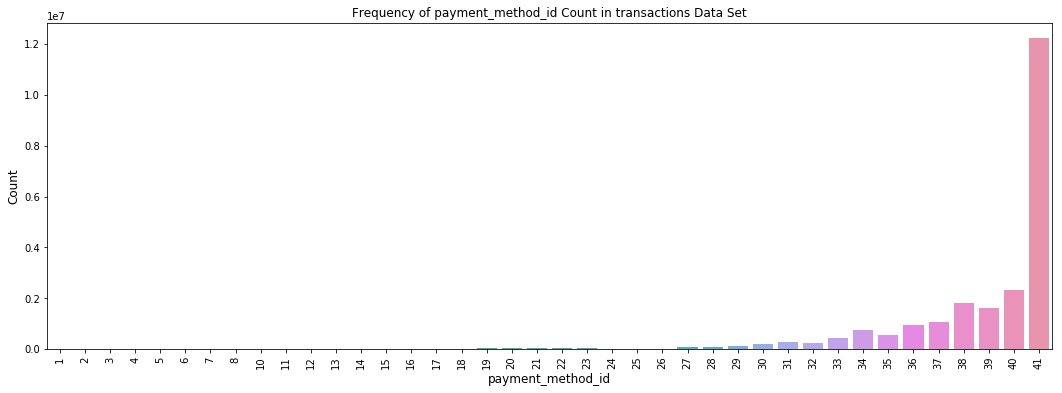

payment_method_id Count [(41, 12223150), (40, 2308030), (38, 1819465), (39, 1603775), (37, 1048103), (36, 945959), (34, 762638), (35, 551158), (33, 427879), (31, 263939), (32, 247463), (30, 182139), (29, 138842), (28, 99185), (27, 64599), (23, 45105), (20, 34929), (19, 34209), (22, 29693), (21, 24729), (18, 16891), (24, 16200), (14, 14293), (25, 13785), (16, 12906), (13, 11621), (17, 9969), (15, 9184), (12, 6692), (26, 5259), (11, 2208), (10, 1366), (7, 1094), (8, 836), (6, 652), (5, 475), (3, 252), (2, 56), (4, 15), (1, 12)]


In [7]:
# payment_method_id count in transactions Data Set
plt.figure(figsize=(18,6))
#plt.subplot(311)
sns.countplot(x="payment_method_id", data=transactions)
plt.ylabel('Count', fontsize=12)
plt.xlabel('payment_method_id', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of payment_method_id Count in transactions Data Set", fontsize=12)
plt.show()
payment_method_id_count = Counter(transactions['payment_method_id']).most_common()
print("payment_method_id Count " +str(payment_method_id_count))

In [116]:
payment_method = pd.DataFrame({'payment_method_id':[i[0] for i in payment_method_id_count],
                              'count': [i[1] for i in payment_method_id_count]
                              })[['payment_method_id','count']]
payment_method['method_ratio'] = payment_method['count'] / sum(payment_method['count']) 
payment_method['top_3_payment_method'] = [0 if c <1819465 else 1 for c in payment_method['count'] ]
payment_method['between_3_to_5_payment_method'] = [1 if 182139 < c <1819465 else 0 for c in payment_method['count'] ]
payment_method['out_of_10_payment_method'] = [1 if c <247463 else 0 for c in payment_method['count'] ]

payment_method.head()

,payment_method_id,count,method_ratio,top_3_payment_method,between_3_to_5_payment_method,out_of_10_payment_method
0,41,12223150,0.531933,1,0,0
1,40,2308030,0.100442,1,0,0
2,38,1819465,0.079180,1,0,0
3,39,1603775,0.069794,0,1,0
4,37,1048103,0.045612,0,1,0


In [37]:
payment_method.payment_ratio.describe() * 100

count    4000.000000
mean        2.500000
std         8.554023
min         0.000052
25%         0.019567
50%         0.090562
75%         1.094846
max        53.193265
Name: payment_ratio, dtype: float64

# plan_list_price

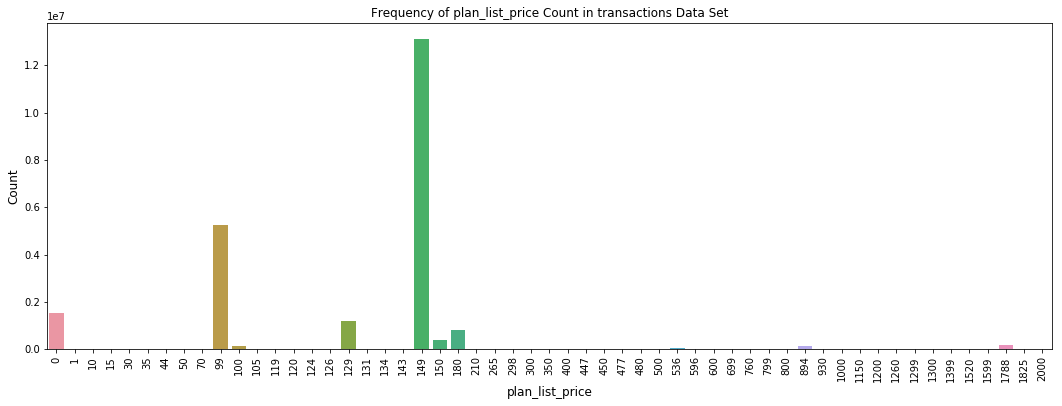

plan_list_price Count [(149, 13131051), (99, 5261183), (0, 1516957), (129, 1197445), (180, 798193), (150, 385004), (1788, 164029), (894, 139556), (100, 124158), (536, 61841), (119, 32807), (480, 26834), (1599, 26190), (477, 18738), (1200, 13089), (298, 11321), (300, 10610), (447, 8389), (930, 7878), (35, 7732), (799, 7698), (120, 6096), (134, 3852), (1299, 3052), (699, 3041), (600, 2732), (450, 1719), (500, 1426), (50, 1053), (1000, 1053), (350, 636), (124, 598), (131, 398), (400, 385), (105, 359), (70, 261), (2000, 248), (143, 147), (126, 145), (1150, 138), (1, 138), (1399, 137), (596, 136), (210, 91), (10, 67), (15, 51), (265, 25), (1260, 25), (1520, 13), (800, 11), (30, 7), (1300, 6), (760, 3), (1825, 2), (44, 1)]


In [38]:
# plan_list_price count in transactions Data Set
plt.figure(figsize=(18,6))
sns.countplot(x="plan_list_price", data=transactions)
plt.ylabel('Count', fontsize=12)
plt.xlabel('plan_list_price', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of plan_list_price Count in transactions Data Set", fontsize=12)
plt.show()
plan_list_price_count = Counter(transactions['plan_list_price']).most_common()
print("plan_list_price Count " +str(plan_list_price_count))

In [113]:
payment_price = pd.DataFrame(
                        {'plan_list_price':[i[0] for i in plan_list_price_count],
                              'count': [i[1] for i in plan_list_price_count]
                              }

                            )[['plan_list_price','count']]
payment_price['plan_list_price_ratio'] = payment_price['count'] / sum(payment_price['count'])

#price:所有data中可能的plan_list_price
payment_price.head() # 有55種price

,plan_list_price,count,plan_list_price_ratio
0,149,13131051,0.571443
1,99,5261183,0.228959
2,0,1516957,0.066016
3,129,1197445,0.052111
4,180,798193,0.034736


# transactions data中有兩種價格以上的方案是？
   

In [212]:
from collections import defaultdict
s = time.time()
pay_m = defaultdict(list)
p_id_bk = None # p_id : payment_method_id
for p_id,p_price in tqdm(transactions[['payment_method_id','plan_list_price']].values[:,:]):
    #if p_price in pay_m[p_id]:
    if p_id_bk == None:
        pass
    else:
        if p_price not in pay_m[p_id]:
            pay_m[p_id].append(p_price)
    p_id_bk = p_id 
e = time.time()
'{0} secs'.format(str(e-s))

100%|██████████| 22978755/22978755 [00:38<00:00, 603545.55it/s]


'38.58124780654907 secs'

In [114]:
pay_m_ = pd.DataFrame({'payment_method_id':[k for k,v in pay_m.items()],
                       'flexible_price':[v for k,v in pay_m.items()]})[['payment_method_id','flexible_price']]
pay_m_['price_len'] = pay_m_.flexible_price.map(len)
pay_m_['price-mean'] = pay_m_.flexible_price.map(np.mean)
pay_m_['price-median'] = pay_m_.flexible_price.map(np.median)
pay_m_['price-max'] = pay_m_.flexible_price.map(max)
pay_m_['price-min'] = pay_m_.flexible_price.map(min)
pay_m_['price_len_ratio'] = pay_m_.price_len / sum(pay_m_.price_len)
pay_m_['is_non-flexible_price'] = [1.0 if i == 1 else 0.0 for i in pay_m_.price_len]
pay_m_.head()

,payment_method_id,flexible_price,price_len,price-mean,price-median,price-max,price-min,price_len_ratio,is_non-flexible_price
0,38,"[1788, 149, 477, 0, 447, 894, 124, 1200, 1299,...",38,542.500000,373.5,1825,0,0.205405,0.0
1,22,"[1599, 894, 1788, 799, 0]",5,1016.000000,894.0,1788,0,0.027027,0.0
2,41,"[99, 149, 0, 119, 129, 100, 134, 120]",8,106.250000,119.5,149,0,0.043243,0.0
3,39,"[149, 0, 894]",3,347.666667,149.0,894,0,0.016216,0.0
4,40,"[149, 0]",2,74.500000,74.5,149,0,0.010811,0.0


# payment_plan_days

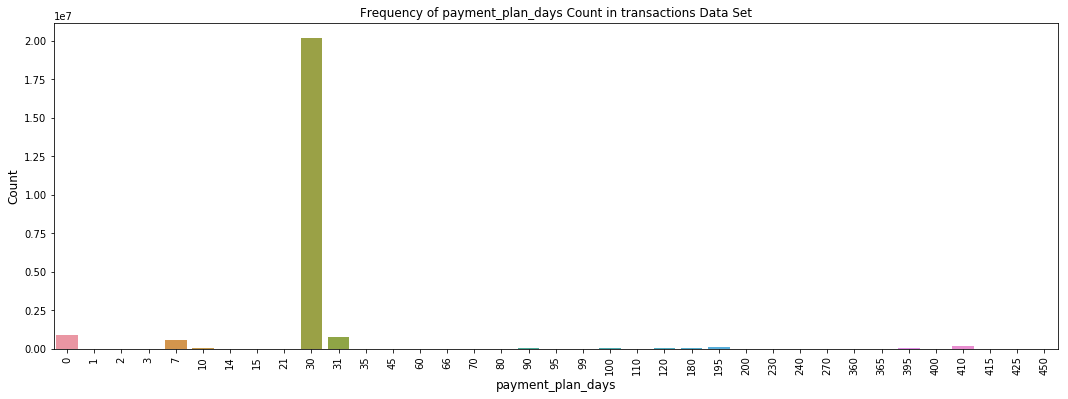

payment_plan_days Count [(30, 20174288), (0, 872342), (31, 766612), (7, 589807), (410, 162236), (195, 138802), (180, 76172), (10, 38632), (90, 31440), (100, 28252), (395, 20543), (120, 13619), (60, 10301), (360, 10144), (200, 8946), (14, 6447), (1, 5435), (240, 4528), (365, 4150), (400, 3673), (415, 3299), (450, 3033), (270, 1187), (45, 1123), (21, 880), (35, 854), (70, 636), (80, 385), (99, 339), (110, 179), (66, 175), (230, 138), (3, 68), (2, 67), (15, 21), (425, 1), (95, 1)]


In [97]:
# payment_plan_days count in transactions Data Set
plt.figure(figsize=(18,6))
sns.countplot(x="payment_plan_days", data=transactions)
plt.ylabel('Count', fontsize=12)
plt.xlabel('payment_plan_days', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of payment_plan_days Count in transactions Data Set", fontsize=12)
plt.show()
payment_plan_days_count = Counter(transactions['payment_plan_days']).most_common()
print("payment_plan_days Count " +str(payment_plan_days_count))


In [115]:
payment_plan_days = pd.DataFrame(
                        {'payment_plan_days':[i[0] for i in payment_plan_days_count],
                              'count': [i[1] for i in payment_plan_days_count]
                              }

                            )[['payment_plan_days','count']]
payment_plan_days['payment_plan_days_ratio'] = payment_plan_days['count'] / sum(payment_plan_days['count'])
payment_plan_days.head() # 有37種plan_days

,payment_plan_days,count,payment_plan_days_ratio
0,30,20174288,0.877954
1,0,872342,0.037963
2,31,766612,0.033362
3,7,589807,0.025667
4,410,162236,0.007060


# transactions data中有兩種payment_plan_days以上的方案是？


In [128]:
s = time.time()
pay_m_days = defaultdict(list) # key: method, value: corresponding list of payment_plan_days 
p_id_bk = None # p_id : payment_method_id
for p_id,p_p_days in transactions[['payment_method_id','payment_plan_days']].values[:,:]:
    #if p_price in pay_m[p_id]:
    if p_id_bk == None:
        pass
    else:
        if p_p_days not in pay_m_days[p_id]:
            pay_m_days[p_id].append(p_p_days)
    p_id_bk = p_id 
e = time.time()
'{0} secs'.format(str(e-s))

'28.125335931777954 secs'

In [136]:
pay_m_days_ = pd.DataFrame({'payment_method_id':[k for k,v in pay_m_days.items()],
                       'flexible_plan_days':[v for k,v in pay_m_days.items()]})[['payment_method_id','flexible_plan_days']]
pay_m_days_['plan_days_len'] = pay_m_days_.flexible_plan_days.map(len)
pay_m_days_['plan_days-mean'] = pay_m_days_.flexible_plan_days.map(np.mean)
pay_m_days_['plan_days-median'] = pay_m_days_.flexible_plan_days.map(np.median)
pay_m_days_['plan_days-max'] = pay_m_days_.flexible_plan_days.map(max)
pay_m_days_['plan_days-min'] = pay_m_days_.flexible_plan_days.map(min)
pay_m_days_['plan_days_len_ratio'] = pay_m_days_.plan_days_len / sum(pay_m_days_.plan_days_len) # 值越大代表這個方案變動程度很高
pay_m_days_['is_non-flexible_plan_days'] = [1.0 if i == 1 else 0.0 for i in pay_m_days_.plan_days_len] # 1.0 代表此方案一直都是只有固定的日子 and vice versa
pay_m_days_

,payment_method_id,flexible_plan_days,plan_days_len,plan_days-mean,plan_days-median,plan_days-max,plan_days-min,plan_days_len_ratio,is_non-flexible_plan_days
0,38,"[410, 30, 120, 0, 10, 35, 99, 110, 195, 7, 360...",26,129.538462,78.0,450,0,0.142857,0.0
1,22,"[395, 195, 410, 180, 0, 400]",6,263.333333,295.0,410,0,0.032967,0.0
2,41,"[30, 0]",2,15.000000,15.0,30,0,0.010989,0.0
3,39,"[31, 0, 30, 195]",4,64.000000,30.5,195,0,0.021978,0.0
4,40,"[31, 0, 30]",3,20.333333,30.0,31,0,0.016484,0.0
5,32,"[195, 410, 180, 270, 90, 415, 240, 360, 395, 4...",14,226.142857,217.5,415,0,0.076923,0.0
6,11,"[31, 0, 30]",3,20.333333,30.0,31,0,0.016484,0.0
7,14,"[0, 30]",2,15.000000,15.0,30,0,0.010989,0.0
8,35,"[7, 95]",2,51.000000,51.0,95,7,0.010989,0.0
9,16,"[30, 410, 195, 400, 180]",5,243.000000,195.0,410,30,0.027473,0.0


# 藉由flexible_price和flexible_plan_days找出方案和方案之間的相關性

In [ ]:
def ratio(list1, list2):
    """
    list1: previous
    list2: current
    
    return: intersection(previous & current) / current
    """
    if len(list1)==0 or len(list2)==0:
        return 
    ret = sum([1 for i in list2 if i in list1]) / len(list2)
    
    return ret

# actual_amount_paid

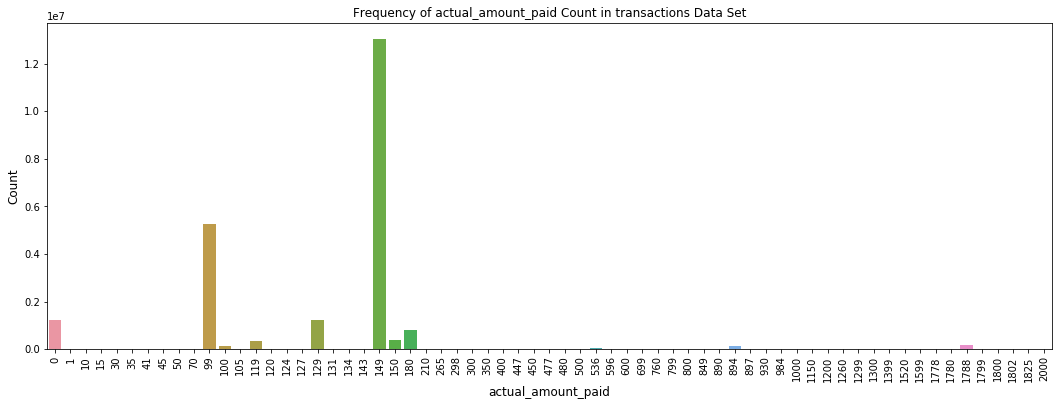

actual_amount_paid Count [(149, 13050523), (99, 5263769), (129, 1228080), (0, 1218324), (180, 792570), (150, 398353), (119, 359186), (1788, 167971), (894, 143126), (100, 124862), (536, 63140), (480, 27027), (1599, 26805), (477, 18738), (1200, 13134), (298, 11321), (300, 10778), (447, 8422), (35, 8214), (930, 7917), (799, 7899), (120, 5173), (134, 4916), (1299, 3052), (699, 3039), (600, 2732), (450, 1765), (500, 1452), (1000, 1086), (50, 1058), (350, 655), (124, 598), (131, 596), (400, 394), (105, 385), (70, 261), (2000, 252), (596, 157), (143, 147), (127, 145), (1150, 140), (1, 138), (1399, 137), (210, 91), (10, 67), (15, 51), (265, 25), (1260, 25), (1520, 13), (800, 11), (30, 7), (1300, 6), (41, 5), (760, 4), (1825, 2), (849, 2), (897, 1), (1778, 1), (1799, 1), (1780, 1), (45, 1), (1800, 1), (890, 1), (984, 1), (1802, 1)]


In [118]:
# actual_amount_paid count in transactions Data Set
plt.figure(figsize=(18,6))
sns.countplot(x="actual_amount_paid", data=transactions)
plt.ylabel('Count', fontsize=12)
plt.xlabel('actual_amount_paid', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of actual_amount_paid Count in transactions Data Set", fontsize=12)
plt.show()
actual_amount_paid_count = Counter(transactions['actual_amount_paid']).most_common()
print("actual_amount_paid Count " +str(actual_amount_paid_count))


In [148]:
actual_amount_paid = pd.DataFrame(
                        {'actual_amount_paid':[i[0] for i in actual_amount_paid_count],
                              'count': [i[1] for i in actual_amount_paid_count]
                              }

                            )[['actual_amount_paid','count']]
actual_amount_paid['actual_amount_paid_ratio'] = actual_amount_paid['count'] / sum(actual_amount_paid['count'])

#price:所有data中可能的plan_list_price
actual_amount_paid.head() # 有65種price

,actual_amount_paid,count,actual_amount_paid_ratio
0,149,13050523,0.567939
1,99,5263769,0.229071
2,129,1228080,0.053444
3,0,1218324,0.053020
4,180,792570,0.034491


# transactions data中有兩種actual_amount_paid以上的方案是？

In [155]:
s = time.time()
pay_m_actual_paid = defaultdict(list) # key: method, value: corresponding list of payment_plan_days 
p_id_bk = None # p_id : payment_method_id
for p_id,a_paid in transactions[['payment_method_id','actual_amount_paid']].values[:,:]:
    #if p_price in pay_m[p_id]:
    if p_id_bk == None:
        pass
    else:
        if a_paid not in pay_m_actual_paid[p_id]:
            pay_m_actual_paid[p_id].append(a_paid)
    p_id_bk = p_id 
e = time.time()
'{0} secs'.format(str(e-s))

'28.325237035751343 secs'

In [157]:
pay_m_actual_paid_ = pd.DataFrame({'payment_method_id':[k for k,v in pay_m_actual_paid.items()],
                       'flexible_actual_paid':[v for k,v in pay_m_actual_paid.items()]})[['payment_method_id','flexible_actual_paid']]
#為什麼會有flexible_actual_paid?可能因為某些方案會有優惠折扣(參見https://ssl.kkbox.com/tw/billing/index.php)
pay_m_actual_paid_['actual_paid_len'] = pay_m_actual_paid_.flexible_actual_paid.map(len)
pay_m_actual_paid_['actual_paid-mean'] = pay_m_actual_paid_.flexible_actual_paid.map(np.mean)
pay_m_actual_paid_['actual_paid-median'] = pay_m_actual_paid_.flexible_actual_paid.map(np.median)
pay_m_actual_paid_['actual_paid-max'] = pay_m_actual_paid_.flexible_actual_paid.map(max)
pay_m_actual_paid_['actual_paid-min'] = pay_m_actual_paid_.flexible_actual_paid.map(min)
pay_m_actual_paid_['actual_paid_len_ratio'] = pay_m_actual_paid_.actual_paid_len / sum(pay_m_actual_paid_.actual_paid_len) # 值越大代表這個方案變動程度很高
pay_m_actual_paid_['is_not_discountable'] = [1.0 if i == 1 else 0.0 for i in pay_m_actual_paid_.actual_paid_len] # 1.0 代表此方案基本上不會有優惠折扣 and vice versa
pay_m_actual_paid_


,payment_method_id,flexible_actual_paid,actual_paid_len,actual_paid-mean,actual_paid-median,actual_paid-max,actual_paid-min,actual_paid_len_ratio,is_not_discountable
0,38,"[1788, 149, 477, 0, 447, 894, 124, 1200, 1299,...",38,542.526316,373.5,1825,0,0.214689,0.0
1,22,"[1599, 894, 1788, 799]",4,1270.000000,1246.5,1788,799,0.022599,0.0
2,41,"[99, 149, 0, 119, 129, 100, 134, 120, 41]",9,99.000000,119.0,149,0,0.050847,0.0
3,39,"[149, 894]",2,521.500000,521.5,894,149,0.011299,0.0
4,40,"[149, 0]",2,74.500000,74.5,149,0,0.011299,0.0
5,32,"[894, 1788, 536, 298, 1599, 1200, 699, 799, 60...",13,727.538462,600.0,1788,0,0.073446,0.0
6,11,[149],1,149.000000,149.0,149,149,0.005650,1.0
7,14,[149],1,149.000000,149.0,149,149,0.005650,1.0
8,35,"[0, 45]",2,22.500000,22.5,45,0,0.011299,0.0
9,16,"[149, 1788, 894, 1599, 799]",5,1045.800000,894.0,1788,149,0.028249,0.0


# merge payment_method into payment_plan_days and plan_list_price
    # payment_method # done
    # payment_price
    # pay_m_ # done
    # payment_plan_days
    # pay_m_days_ # done
    # actual_amount_paid
    # pay_m_actual_paid_ # done

In [162]:
payment_method.head()
df = pd.merge(payment_method, pay_m_, 
        on = 'payment_method_id', how = 'left').merge(pay_m_days_,
        on = 'payment_method_id', how = 'left').merge(pay_m_actual_paid_,
        on = 'payment_method_id', how = 'left')
print (df.columns)
df.head()

Index(['payment_method_id', 'count', 'method_ratio', 'top_3_payment_method',
       'between_3_to_5_payment_method', 'out_of_10_payment_method',
       'flexible_price', 'price_len', 'price-mean', 'price-median',
       'price-max', 'price-min', 'price_len_ratio', 'is_non-flexible_price',
       'flexible_plan_days', 'plan_days_len', 'plan_days-mean',
       'plan_days-median', 'plan_days-max', 'plan_days-min',
       'plan_days_len_ratio', 'is_non-flexible_plan_days',
       'flexible_actual_paid', 'actual_paid_len', 'actual_paid-mean',
       'actual_paid-median', 'actual_paid-max', 'actual_paid-min',
       'actual_paid_len_ratio', 'is_not_discountable'],
      dtype='object')


,payment_method_id,count,method_ratio,top_3_payment_method,between_3_to_5_payment_method,out_of_10_payment_method,flexible_price,price_len,price-mean,price-median,...,plan_days_len_ratio,is_non-flexible_plan_days,flexible_actual_paid,actual_paid_len,actual_paid-mean,actual_paid-median,actual_paid-max,actual_paid-min,actual_paid_len_ratio,is_not_discountable
0,41,12223150,0.531933,1,0,0,"[99, 149, 0, 119, 129, 100, 134, 120]",8,106.250000,119.5,...,0.010989,0.0,"[99, 149, 0, 119, 129, 100, 134, 120, 41]",9,99.000000,119.0,149,0,0.050847,0.0
1,40,2308030,0.100442,1,0,0,"[149, 0]",2,74.500000,74.5,...,0.016484,0.0,"[149, 0]",2,74.500000,74.5,149,0,0.011299,0.0
2,38,1819465,0.079180,1,0,0,"[1788, 149, 477, 0, 447, 894, 124, 1200, 1299,...",38,542.500000,373.5,...,0.142857,0.0,"[1788, 149, 477, 0, 447, 894, 124, 1200, 1299,...",38,542.526316,373.5,1825,0,0.214689,0.0
3,39,1603775,0.069794,0,1,0,"[149, 0, 894]",3,347.666667,149.0,...,0.021978,0.0,"[149, 894]",2,521.500000,521.5,894,149,0.011299,0.0
4,37,1048103,0.045612,0,1,0,"[149, 0]",2,74.500000,74.5,...,0.016484,0.0,[149],1,149.000000,149.0,149,149,0.005650,1.0


In [172]:
col = ['payment_method_id','flexible_price','flexible_plan_days','is_non-flexible_price','is_non-flexible_plan_days','flexible_actual_paid']
df[col]

,payment_method_id,flexible_price,flexible_plan_days,is_non-flexible_price,is_non-flexible_plan_days,flexible_actual_paid
0,41,"[99, 149, 0, 119, 129, 100, 134, 120]","[30, 0]",0.0,0.0,"[99, 149, 0, 119, 129, 100, 134, 120, 41]"
1,40,"[149, 0]","[31, 0, 30]",0.0,0.0,"[149, 0]"
2,38,"[1788, 149, 477, 0, 447, 894, 124, 1200, 1299,...","[410, 30, 120, 0, 10, 35, 99, 110, 195, 7, 360...",0.0,0.0,"[1788, 149, 477, 0, 447, 894, 124, 1200, 1299,..."
3,39,"[149, 0, 894]","[31, 0, 30, 195]",0.0,0.0,"[149, 894]"
4,37,"[149, 0]","[31, 0, 30]",0.0,0.0,[149]
5,36,"[180, 150, 0, 210, 500]","[30, 0]",0.0,0.0,"[180, 150, 210, 500]"
6,34,"[0, 149, 894]","[0, 30, 195]",0.0,0.0,"[149, 894, 0]"
7,35,"[0, 44]","[7, 95]",0.0,0.0,"[0, 45]"
8,33,"[149, 0, 894]","[30, 0, 195]",0.0,0.0,"[149, 0, 894]"
9,31,"[0, 149, 894, 799]","[0, 30, 195, 180]",0.0,0.0,"[149, 894, 799, 0]"


#  kkbox 付費方案主要有兩種, according to [https://help.kkbox.com/tw/zh-tw/billing/pay-types/236]

    ### 1.每月自動扣款續約(automatic_renewal) （持續至用戶主動申請退租解約為止）
            - price: 每月149
            - registered_via: VISA / MasterCard / JCB 信用卡/遠傳、台灣大哥大（適用泛亞及東信） 等電信業者以電信/網路帳單每月自動續約扣款/LINE Pay
            
    ### 2.單筆購買(single_purchase)（約滿到期自動停止and亦無法中途申請取消或退租解約）
            - price:  365天（再送45天）・1788元／180天（再送15天）・894元
            - registered_via: 7-11 ibon VISA / MasterCard /列印訂單、ATM轉帳、WebATM／SmartPay消費扣款（免手續費）、超商、郵局代收繳費/ LINE Pay

In [208]:
def is_single_purchase(x):
    # 這個方案是單筆購買麼？
    # case1: payment_plan_days == 410 and plan_list_price == 1788
    # case2: payment_plan_days == 195 and plan_list_price == 894
    # case3: payment_plan_days == 180 and plan_list_price == 536 --> 1.國泰世華KOKO(COMBO)信用卡 2.國泰世華Play悠遊聯名卡
    if 1788 in x.flexible_price and 410 in x.flexible_plan_days:
        return 1.0
    elif 894 in x.flexible_price and 195 in x.flexible_plan_days:
        return 1.0
    elif 536 in x.flexible_price and 180 in x.flexible_plan_days:
        return 1.0
    else:
        return 0.0   
    return
def is_from_cathay(x):
    # 這個方案是刷國泰世華的信用卡麼？
    if 536 in x.flexible_price and 180 in x.flexible_plan_days:
        return 1.0
    else:
        return 0.0
def is_automatic_renewal(x):
    # 這個方案是自動續約麼
    # case1: payment_plan_days = 30, plan_list_price == 149 and actual_amount_paid == 149 --> 1.月租型 2. 中華電信emome付款 
    # case2: payment_plan_days = 30, plan_list_price == 149 and actual_amount_paid <= 99  --> 中國信託酷玩卡優惠（次月回饋50)
    # case3: payment_plan_days = 90, plan_list_price == 298 --> VISA金融卡優惠(第91天起每月自動扣繳 NT$149)
    # Reference : https://ssl.kkbox.com/tw/billing/index.php
    if 149 in x.flexible_price and 30 in x.flexible_plan_days:
        return 1.0
    elif 298 in x.flexible_price and 90 in x.flexible_plan_days:
        return 1.0
    else:
        return 0.0    
    return 
def is_visa_debit(x):
    # 這個方案來自VISA金融卡優惠？
    if 298 in x.flexible_price and 90 in x.flexible_plan_days:
        return 1.0
    else:
        return 0.0
def is_from_ctbc_bank(x):
    # 這個方案來自中國信託酷玩卡優惠麼？
    if 149 in x.flexible_price and 30 in x.flexible_plan_days and 99 in x.flexible_actual_paid:
        return 1.0
    else:
        return 0.0
def is_student(x):
    # 這個方案是學生方案麼
    # case0: plan_list_price == 100 -->青年學生限時專案
    # The following is 青年學生專案
    # case1: payment_plan_days = 90, plan_list_price == 300
    # case2: payment_plan_days = 180, plan_list_price == 600
    # case3: payment_plan_days = 360, plan_list_price == 1200
    # case4: Reference: https://www.ptt.cc/bbs/Lifeismoney/M.1485076197.A.0A4.html
    
    # x.flexible_price: list of price 
    # x.flexible_plan_days: list of payment
    if 100 in x.flexible_price:
        return 1.0
    elif 300 in x.flexible_price and 90 in x.flexible_plan_days:
        return 1.0
    elif 600 in x.flexible_price and 180 in x.flexible_plan_days:
        return 1.0
    elif 1200 in x.flexible_price and 360 in x.flexible_plan_days:
        return 1.0
    else:
        return 0.0
def is_free(x):
    # 這個方案曾經有0元麼
    if 0 in x.flexible_price:
        return 1.0
    else:
        return 0.0



## plan_list_price == 1520 --> KKBOX＋KKTV 影音雙享180天優惠方案





In [211]:
df['is_student_programe'] = df.apply(is_student, axis = 1)
df['is_automatic_renewal'] = df.apply(is_automatic_renewal, axis = 1)
df['is_single_purchase'] = df.apply(is_single_purchase, axis = 1)
df['is_from_cathay'] = df.apply(is_from_cathay, axis = 1)
df['is_from_ctbc_bank'] = df.apply(is_from_ctbc_bank, axis = 1)
df['is_visa_debit'] = df.apply(is_visa_debit, axis = 1)
df['has_been_free'] = df.apply(is_free, axis = 1)
df[['payment_method_id','flexible_price','flexible_plan_days','has_been_free','flexible_actual_paid'
    ,'is_from_cathay','is_from_ctbc_bank','is_visa_debit','is_automatic_renewal','is_student_programe']]

,payment_method_id,flexible_price,flexible_plan_days,has_been_free,flexible_actual_paid,is_from_cathay,is_from_ctbc_bank,is_visa_debit,is_automatic_renewal,is_student_programe
0,41,"[99, 149, 0, 119, 129, 100, 134, 120]","[30, 0]",1.0,"[99, 149, 0, 119, 129, 100, 134, 120, 41]",0.0,1.0,0.0,1.0,1.0
1,40,"[149, 0]","[31, 0, 30]",1.0,"[149, 0]",0.0,0.0,0.0,1.0,0.0
2,38,"[1788, 149, 477, 0, 447, 894, 124, 1200, 1299,...","[410, 30, 120, 0, 10, 35, 99, 110, 195, 7, 360...",1.0,"[1788, 149, 477, 0, 447, 894, 124, 1200, 1299,...",0.0,0.0,1.0,1.0,1.0
3,39,"[149, 0, 894]","[31, 0, 30, 195]",1.0,"[149, 894]",0.0,0.0,0.0,1.0,0.0
4,37,"[149, 0]","[31, 0, 30]",1.0,[149],0.0,0.0,0.0,1.0,0.0
5,36,"[180, 150, 0, 210, 500]","[30, 0]",1.0,"[180, 150, 210, 500]",0.0,0.0,0.0,0.0,0.0
6,34,"[0, 149, 894]","[0, 30, 195]",1.0,"[149, 894, 0]",0.0,0.0,0.0,1.0,0.0
7,35,"[0, 44]","[7, 95]",1.0,"[0, 45]",0.0,0.0,0.0,0.0,0.0
8,33,"[149, 0, 894]","[30, 0, 195]",1.0,"[149, 0, 894]",0.0,0.0,0.0,1.0,0.0
9,31,"[0, 149, 894, 799]","[0, 30, 195, 180]",1.0,"[149, 894, 799, 0]",0.0,0.0,0.0,1.0,0.0


# 這個人認為這個方案的cp值cp value (一天不到幾元)